### This is a Markdown cell

In [1]:
!pip install spotpy

In [1]:
# A main module to run various analysis with CFE model
import os
import sys
import numpy as np
import pandas as pd
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import json

cfe_ver = "Ryoko"
if cfe_ver == "Ryoko":
    sys.path.append("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/3_model/libs/cfe/py_cfe")
elif cfe_ver == "NOAA":
    sys.path.append("G:/Shared drives/Ryoko and Hilary/Github_ex/cfe/py_cfe")
    
import cfe
import bmi_cfe

# specify current directory create output directory if it does not exist
os.chdir("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/3_model")
os.getcwd()
out_path = '..\\4_out\\debug'
if not os.path.exists(out_path):
    os.mkdir(out_path)
data_file_path = '..\\2_data_input\\debug'

0.1
1


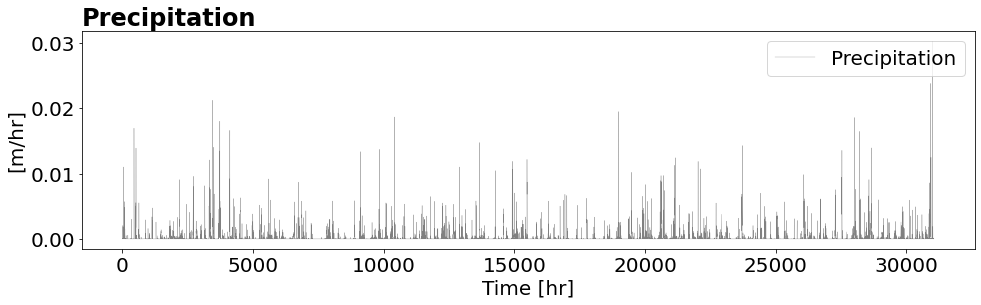

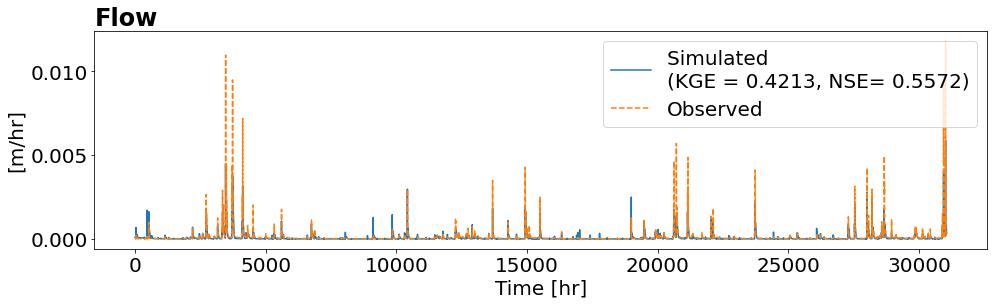

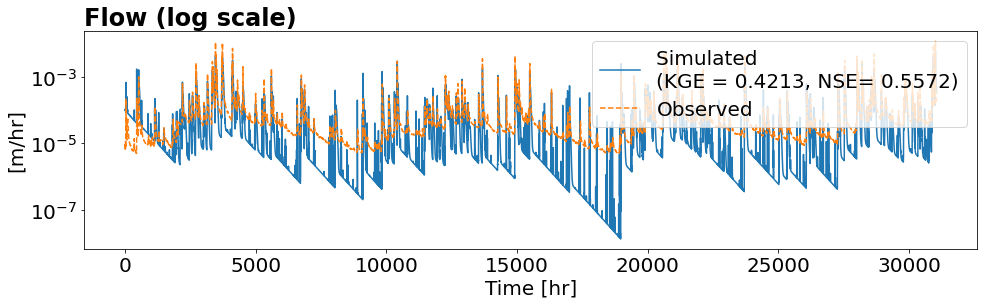

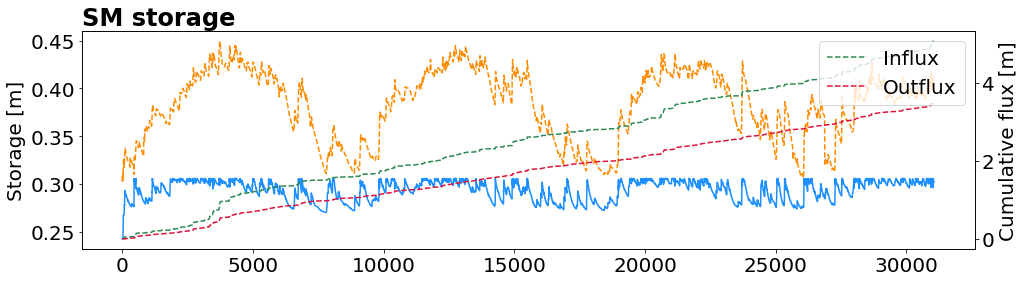

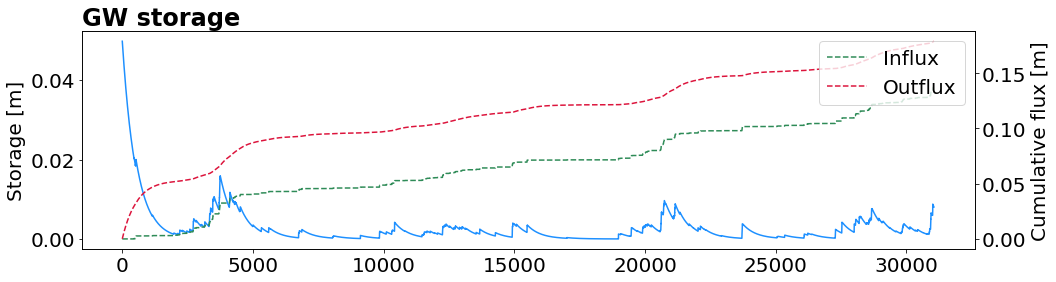

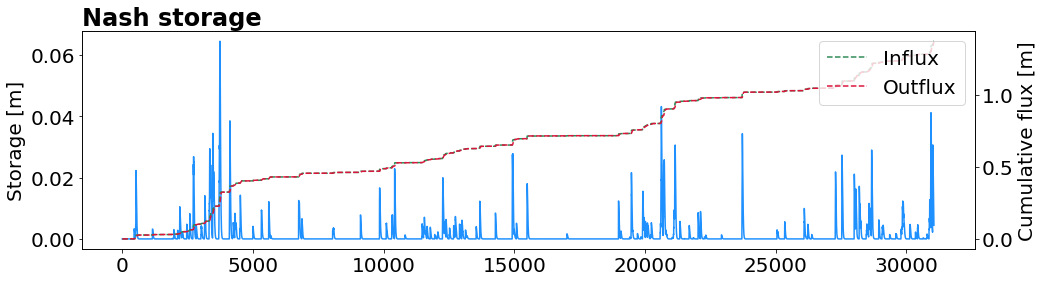

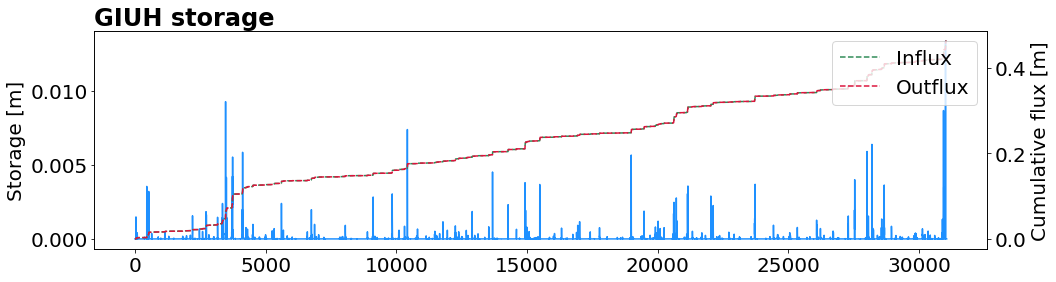


GLOBAL MASS BALANCE
  initial volume:   0.2927
    volume input:   5.9829
   volume output:   4.4575
    final volume:   0.3104
        residual: 1.5077e+00

 AET & PET
    volume PET:   4.0315
    volume AET:   2.4464

SCHAAKE MASS BALANCE
    volume input:   5.9829
ET from rainfall:   0.4567
  surface runoff:   0.4614
    infiltration:   5.0648
schaake residual: 4.6185e-14

GIUH MASS BALANCE
  vol. into giuh:   0.4614
   vol. out giuh:   0.4614
 vol. end giuh q:   0.0000
   giuh residual: -2.2760e-15

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.2427
  vol. into soil:   5.0648
vol.soil2latflow:   1.3706
 vol. soil to gw:   0.1371
 vol. soil to ET:   1.9897
 final vol. soil:   0.3023
vol. soil resid.: 1.5077e+00

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   1.3706
  vol. from nash:   1.3662
 final vol. nash:   0.0045
nash casc resid.: -2.4329e-15

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.0500
       vol to gw:   0

In [2]:
if cfe_ver == "Ryoko":
    input_path = os.path.join(data_file_path, 'config_cfe.json')
    input_config = {
        # "forcing_file": "..\\2_data_input\\debug\\mahurangi_1998_2001.csv",
        "forcing_file": "..\\2_data_input\\Mahurangi\\full\\mahurangi_1998_2001.csv",
        "catchment_area_km2": 46.65, 
        "soil_params": { # bounds, init
            "bb":10, # 2-15, 8.17
            "satdk": 0.00013888888, # 1E-07-1E-05, but can be larger? 
            "slop": 1, # 0-1, 0.02
            "satpsi": 0.657124897, # 0.02-0.78, 0.263 
            "smcmax": 0.418156524,  # 0.33-0.7, 0.57
            "wltsmc": 0.310002781,  # 0-0.7, 0.35 or 0.17
            "D": 0.87,                     # fixed 
            # params that defines soil primary fluxes are defined by other parameters 
            # "coeff_secondary" is defined by K_lf
            "exponent_secondary":1, #?,1
        },   
        "max_gw_storage":0.5,        # 10-250, 16 or 50
        "Cgw": 5, # ?, 0.01 or 1
        "expon": 0.0002, # 1-8, 3 or 6
        "K_lf":0.5, # 46.875000531249995,                  # fixed
        "K_nash":0.1,               # fixed
        "nash_storage": [0.0, 0.0, 0.0],                  # fixed
        "giuh_ordinates": [0.1, 0.2, 0.4, 0.2, 0.1], # [0.1, 0.35, 0.2, 0.14, 0.1, 0.06, 0.05], # fixed # 
        "trigger_z_m":0.109099529,         # 0.01-0.87
        "fc_atm_press_fraction": 0.33,         # 0.01-0.33
        "refkdt":0.496733933,            # 0.1-4, 3
        "stand_alone": 1,
        "unit_test": 1,
        # "compare_results_file": "G:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\2_data_input\\debug\\test_sm_basinavg.csv",
        "compare_results_file": "G:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\2_data_input\\Mahurangi\\full\\test_sm_basinavg.csv",
     
    }

    """
elif cfe_ver == "NOAA":
    input_path = os.path.join(data_file_path, 'full', 'config_cfe_uptodate.json')
    input_config = {
        "forcing_file": "..\\2_data_input\\debug\\mahurangi_1998_2001.csv",
        "catchment_area_km2": 46.65, 
        "soil_params": { # bounds, init
            "bb": 10, # 2-15, 8.17
            "mult": 1000.0,
            "satdk": 1E-04, # 1E-07-1E-05, but can be larger? 
            "satpsi": 0.33, # 0.02-0.78, 0.263 
            "slop": 0.2, # 0-1, 0.02
            "smcmax": 0.5,  # 0.33-0.7, 0.57
            "wltsmc": 0.3,  # 0-0.7, 0.35 or 0.17
            "D": 0.87,                     # fixed 
            "exponent_primary": 1.0,       # fixed
            "coeff_secondary": 1,   # ?, 0.01
            "exponent_secondary": 1, # ?, 1
            "depth": 0.5
        },
        "max_gw_storage": 50,        # 10-250, 16 or 50
        "gw_storage":10, 
        "soil_storage":0.5,
        "gw_coeff_primary": 0.01,                   # ?, 0.01 or 1
        "gw_exponent_primary": 1,                  # 1-8, 3 or 6
        "gw_coeff_secondary": 0.01, 
        "gw_exponent_secondary": 1,
        "Cgw": 0.01,
        "expon": 1,
        "K_lf": 46.875000531249995,                  # fixed
        "K_nash": 0.03,               # fixed
        "nash_storage": [0.0, 0.0],                  # fixed
        "giuh_ordinates": [0.1, 0.35, 0.2, 0.14, 0.1, 0.06, 0.05], # fixed
        "refkdt": 0.1,                 # 0.1-4, 3
        "trigger_z_m": 0.5,           # 0.01-0.87
        "alpha_fc": 0.33,               # 0.01-0.33
        "stand_alone": 1,
        "unit_test": 1,
        "compare_results_file": "G:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\2_data_input\\debug\\test_sm_basinavg.csv",
    }
"""

with open(input_path, 'w') as outfile:
    json.dump(input_config, outfile)

with open(input_path) as outfile:
    loaded_data = json.load(outfile)

cfe_instance = bmi_cfe.BMI_CFE(input_path)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False)
cfe_instance.finalize(print_mass_balance=True)